In [17]:
!pip install matplotlib

import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [90]:
# Define the directory where the images are located
directory = '../datasets/image_classifier/dataset1/known_images'

# Get a list of all the image files in the directory
image_files = os.listdir(directory)

# Define the target image size
image_size = (256, 256)

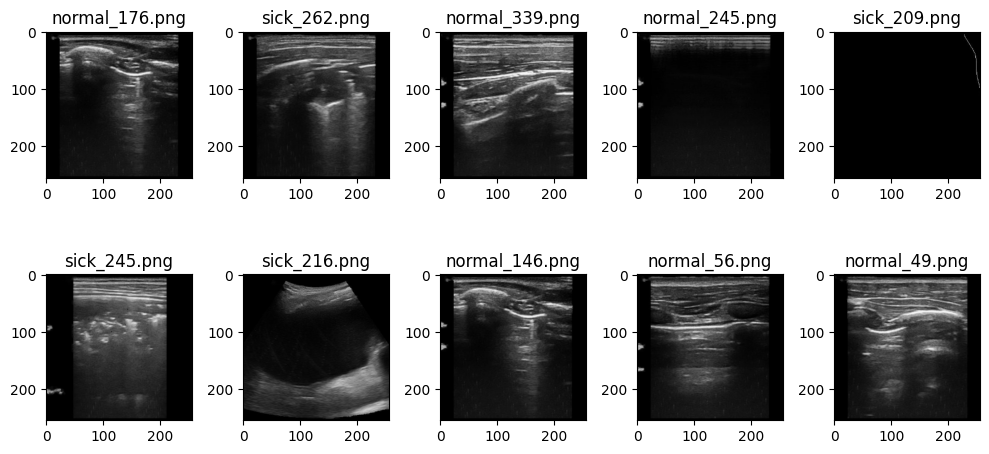

In [91]:
# Plot some example images from the dataset
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axs.flat):
    img = cv2.imread(os.path.join(directory, image_files[i]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, image_size)
    ax.imshow(img)
    ax.set_title(image_files[i])
plt.tight_layout()
plt.show()

In [73]:
!pip install pandas
!pip install scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split

# generate list of corresponding classes using list comprehension
classes = ["normal" if "normal" in name else "sick" for name in image_files]

# create a dataframe with image names and classes
data = pd.DataFrame({"filename": image_files, "class": classes})

# save the dataframe as a csv file
data.to_csv("data1.csv", index=False)

# partition the data into training and validation sets
train_data, valid_data = train_test_split(data, test_size=0.2, random_state=42)

# print number of images in training and validation sets
print("Training images:", len(train_data))
print("Validation images:", len(valid_data))

Training images: 572
Validation images: 143


In [74]:
from tensorflow.keras import layers

# Create ImageDataGenerator with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create ImageDataGenerator without data augmentation
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set batch size and image size
batch_size = 32
img_size = (256, 256)

# Create generators from DataFrames
train_generator = train_datagen.flow_from_dataframe(
    train_data,
    directory=directory,
    x_col='filename',
    y_col='class',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_dataframe(
    valid_data,
    directory=directory,
    x_col='filename',
    y_col='class',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 572 validated image filenames belonging to 2 classes.
Found 143 validated image filenames belonging to 2 classes.


In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

In [92]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the directory to save the model weights
checkpoint_path = "model_checkpoints/cp.ckpt"

# Create a ModelCheckpoint callback to save the best model weights
checkpoint_callback = ModelCheckpoint(
    checkpoint_path, 
    monitor='val_accuracy', 
    save_best_only=True, 
    mode='max', 
    verbose=1
)

In [93]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 40

history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=epochs,
    callbacks=[checkpoint_callback]
)

2023-05-09 07:51:37.027064: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Epoch 1/40
18/18 [==============================] - ETA: 0s - loss: 0.3427 - accuracy: 0.8636

2023-05-09 07:52:14.205989: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]



Epoch 1: val_accuracy improved from -inf to 0.86014, saving model to model_checkpoints/cp.ckpt


2023-05-09 07:52:19.618065: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2023-05-09 07:52:20.009044: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_checkpoints/cp.ckpt/assets


INFO:tensorflow:Assets written to: model_checkpoints/cp.ckpt/assets


18/18 [==============================] - 44s 2s/step - loss: 0.3427 - accuracy: 0.8636 - val_loss: 0.2940 - val_accuracy: 0.8601
Epoch 2/40
18/18 [==============================] - ETA: 0s - loss: 0.1854 - accuracy: 0.9283
Epoch 2: val_accuracy improved from 0.86014 to 0.86713, saving model to model_checkpoints/cp.ckpt


2023-05-09 07:52:59.135559: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2023-05-09 07:52:59.450907: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_checkpoints/cp.ckpt/assets


INFO:tensorflow:Assets written to: model_checkpoints/cp.ckpt/assets


18/18 [==============================] - 40s 2s/step - loss: 0.1854 - accuracy: 0.9283 - val_loss: 0.2831 - val_accuracy: 0.8671
Epoch 3/40
18/18 [==============================] - ETA: 0s - loss: 0.1489 - accuracy: 0.9423
Epoch 3: val_accuracy improved from 0.86713 to 0.87413, saving model to model_checkpoints/cp.ckpt


2023-05-09 07:53:34.402081: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2023-05-09 07:53:34.662254: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_checkpoints/cp.ckpt/assets


INFO:tensorflow:Assets written to: model_checkpoints/cp.ckpt/assets


18/18 [==============================] - 36s 2s/step - loss: 0.1489 - accuracy: 0.9423 - val_loss: 0.3501 - val_accuracy: 0.8741
Epoch 4/40
18/18 [==============================] - ETA: 0s - loss: 0.1468 - accuracy: 0.9476
Epoch 4: val_accuracy improved from 0.87413 to 0.93706, saving model to model_checkpoints/cp.ckpt


2023-05-09 07:54:08.886306: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2023-05-09 07:54:09.132125: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_checkpoints/cp.ckpt/assets


INFO:tensorflow:Assets written to: model_checkpoints/cp.ckpt/assets


18/18 [==============================] - 37s 2s/step - loss: 0.1468 - accuracy: 0.9476 - val_loss: 0.1471 - val_accuracy: 0.9371
Epoch 5/40
18/18 [==============================] - ETA: 0s - loss: 0.1360 - accuracy: 0.9493
Epoch 5: val_accuracy improved from 0.93706 to 0.94406, saving model to model_checkpoints/cp.ckpt


2023-05-09 07:54:54.084109: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2023-05-09 07:54:54.270108: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_checkpoints/cp.ckpt/assets


INFO:tensorflow:Assets written to: model_checkpoints/cp.ckpt/assets


18/18 [==============================] - 42s 2s/step - loss: 0.1360 - accuracy: 0.9493 - val_loss: 0.1147 - val_accuracy: 0.9441
Epoch 6/40
18/18 [==============================] - ETA: 0s - loss: 0.1504 - accuracy: 0.9371
Epoch 6: val_accuracy did not improve from 0.94406
18/18 [==============================] - 31s 2s/step - loss: 0.1504 - accuracy: 0.9371 - val_loss: 0.1697 - val_accuracy: 0.9301
Epoch 7/40
18/18 [==============================] - ETA: 0s - loss: 0.1413 - accuracy: 0.9371
Epoch 7: val_accuracy did not improve from 0.94406
18/18 [==============================] - 31s 2s/step - loss: 0.1413 - accuracy: 0.9371 - val_loss: 0.1295 - val_accuracy: 0.9301
Epoch 8/40
18/18 [==============================] - ETA: 0s - loss: 0.1313 - accuracy: 0.9528
Epoch 8: val_accuracy did not improve from 0.94406
18/18 [==============================] - 32s 2s/step - loss: 0.1313 - accuracy: 0.9528 - val_loss: 0.1713 - val_accuracy: 0.9301
Epoch 9/40
18/18 [==============================]

2023-05-09 07:57:20.253387: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2023-05-09 07:57:20.491782: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_checkpoints/cp.ckpt/assets


INFO:tensorflow:Assets written to: model_checkpoints/cp.ckpt/assets


18/18 [==============================] - 34s 2s/step - loss: 0.1242 - accuracy: 0.9510 - val_loss: 0.0992 - val_accuracy: 0.9580
Epoch 10/40
18/18 [==============================] - ETA: 0s - loss: 0.1380 - accuracy: 0.9441
Epoch 10: val_accuracy did not improve from 0.95804
18/18 [==============================] - 31s 2s/step - loss: 0.1380 - accuracy: 0.9441 - val_loss: 0.1402 - val_accuracy: 0.9510
Epoch 11/40
18/18 [==============================] - ETA: 0s - loss: 0.1456 - accuracy: 0.9476
Epoch 11: val_accuracy did not improve from 0.95804
18/18 [==============================] - 32s 2s/step - loss: 0.1456 - accuracy: 0.9476 - val_loss: 0.0950 - val_accuracy: 0.9580
Epoch 12/40
18/18 [==============================] - ETA: 0s - loss: 0.1376 - accuracy: 0.9458
Epoch 12: val_accuracy did not improve from 0.95804
18/18 [==============================] - 32s 2s/step - loss: 0.1376 - accuracy: 0.9458 - val_loss: 0.1696 - val_accuracy: 0.9301
Epoch 13/40
18/18 [========================

2023-05-09 08:05:45.196155: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2023-05-09 08:05:45.445489: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model_checkpoints/cp.ckpt/assets


INFO:tensorflow:Assets written to: model_checkpoints/cp.ckpt/assets


18/18 [==============================] - 41s 2s/step - loss: 0.1189 - accuracy: 0.9510 - val_loss: 0.1084 - val_accuracy: 0.9720
Epoch 22/40
18/18 [==============================] - ETA: 0s - loss: 0.1093 - accuracy: 0.9510
Epoch 22: val_accuracy did not improve from 0.97203
18/18 [==============================] - 36s 2s/step - loss: 0.1093 - accuracy: 0.9510 - val_loss: 0.2381 - val_accuracy: 0.9301
Epoch 23/40
18/18 [==============================] - ETA: 0s - loss: 0.1416 - accuracy: 0.9406
Epoch 23: val_accuracy did not improve from 0.97203
18/18 [==============================] - 35s 2s/step - loss: 0.1416 - accuracy: 0.9406 - val_loss: 0.3770 - val_accuracy: 0.8671
Epoch 24/40
18/18 [==============================] - ETA: 0s - loss: 0.1543 - accuracy: 0.9388
Epoch 24: val_accuracy did not improve from 0.97203
18/18 [==============================] - 37s 2s/step - loss: 0.1543 - accuracy: 0.9388 - val_loss: 0.1012 - val_accuracy: 0.9580
Epoch 25/40
18/18 [========================

In [94]:
model.save("trained_model.h5")

In [95]:
# Load the saved model architecture
model = load_model('trained_model.h5')

# Load the best weights of the trained model
model.load_weights(checkpoint_path)

# Evaluate the model on the validation set
loss, accuracy = model.evaluate(valid_generator)
print("Validation loss:", loss)
print("Validation accuracy:", accuracy)

2023-05-09 08:23:16.450173: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open model_checkpoints/cp.ckpt: FAILED_PRECONDITION: model_checkpoints/cp.ckpt; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?
2023-05-09 08:23:20.250963: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


5/5 [==============================] - 1s 249ms/step - loss: 0.1084 - accuracy: 0.9720
Validation loss: 0.10841480642557144
Validation accuracy: 0.9720279574394226


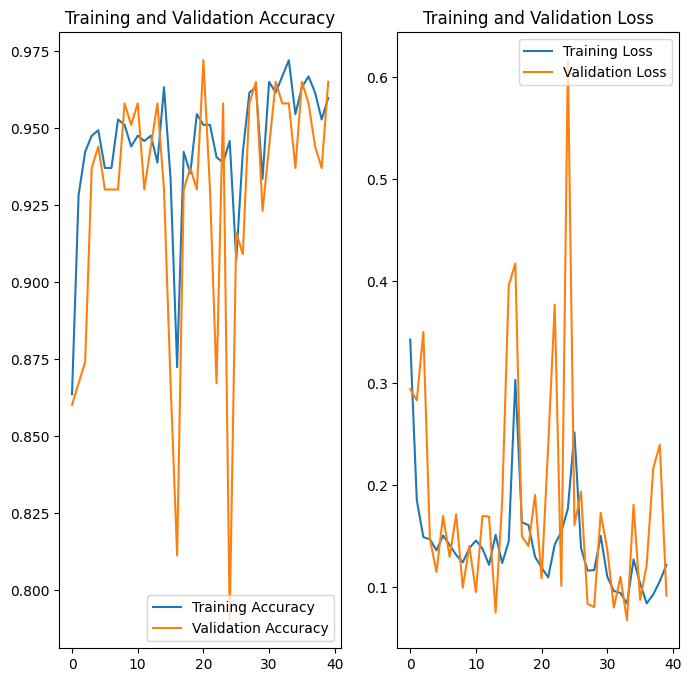

In [96]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

2023-05-09 08:30:58.442040: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


5/5 [==============================] - 1s 197ms/step


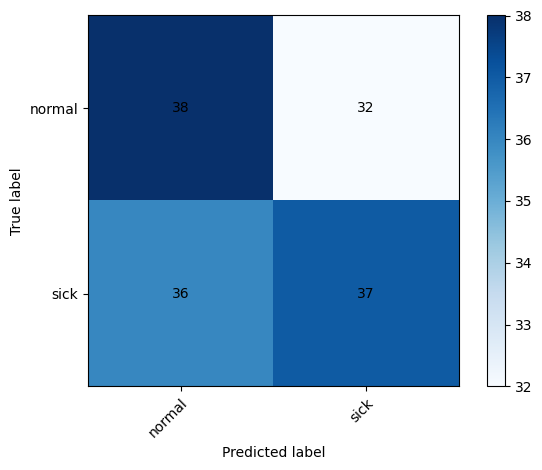

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Define the classes
classes = ['normal', 'sick']

# Get the true labels from the validation generator
y_true = valid_generator.classes

# Use the model to make predictions on the validation set
y_pred = model.predict(valid_generator)

# Convert the predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_labels)

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
# Set the classes as labels on the x and y axes
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       xlabel='Predicted label', ylabel='True label')
# Rotate the x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
# Loop over the data and add the count values to the plot
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="black" if cm[i, j] > cm.max() / 2. else "white")
fig.tight_layout()
plt.show()

In [121]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_true, y_pred_labels)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.51      0.54      0.53        70
           1       0.54      0.51      0.52        73

    accuracy                           0.52       143
   macro avg       0.52      0.52      0.52       143
weighted avg       0.53      0.52      0.52       143



In [103]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load the trained model
model = load_model('trained_model.h5')
model.load_weights(checkpoint_path)

# Define the directory where the unlabelled images are located
image_dir = '../datasets/image_classifier/dataset1/unknown_images/'

predictions = []

# Loop through all the image files in the directory
for file_name in os.listdir(image_dir):
    # Load the image
    image_path = os.path.join(image_dir, file_name)
    image = load_img(image_path, target_size=(256, 256))

    # Convert the image to a numpy array
    image_array = img_to_array(image)

    # Rescale the pixel values
    image_array = image_array / 255.0

    # Add a batch dimension
    image_array = np.expand_dims(image_array, axis=0)

    # Use the trained model to predict the class of the image
    prediction = model.predict(image_array)

    # Print the predicted class
    if prediction[0][0] > prediction[0][1]:
        print(f"{file_name} is predicted to be normal.")
        predictions.append(('normal', file_name))
    else:
        print(f"{file_name} is predicted to be sick.")
        predictions.append(('sick', file_name))

2023-05-09 08:42:02.390581: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open model_checkpoints/cp.ckpt: FAILED_PRECONDITION: model_checkpoints/cp.ckpt; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


1/1 [==============================] - 0s 58ms/step
38.png is predicted to be normal.
1/1 [==============================] - 0s 28ms/step
34.png is predicted to be sick.
1/1 [==============================] - 0s 51ms/step
5.png is predicted to be normal.
1/1 [==============================] - 0s 29ms/step
49.png is predicted to be normal.
1/1 [==============================] - 0s 36ms/step
31.png is predicted to be normal.
1/1 [==============================] - 0s 26ms/step
17.png is predicted to be normal.
1/1 [==============================] - 0s 125ms/step
11.png is predicted to be normal.
1/1 [==============================] - 0s 30ms/step
3.png is predicted to be normal.
1/1 [==============================] - 0s 26ms/step
6.png is predicted to be sick.
1/1 [==============================] - 0s 75ms/step
29.png is predicted to be normal.
1/1 [==============================] - 0s 31ms/step
14.png is predicted to be sick.
1/1 [==============================] - 0s 31ms/step
30.png is 

In [104]:
# Save the predictions to a CSV file
with open('unlabelled_predictions.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Label", "Filename"])
    for prediction in predictions:
        writer.writerow(prediction)

In [112]:
# Import the necessary libraries and define the images and csv directory
import pandas as pd
import os

directory = '../datasets/image_classifier/dataset2/images/'
image_files = os.listdir(directory)

labels_df = pd.read_csv('../datasets/image_classifier/dataset2/image_classes.csv')

In [114]:
# Merge the two dataframes on the patient column
image_data = pd.DataFrame({'filename': image_files})
image_data['patient'] = image_data['filename'].apply(lambda x: os.path.splitext(x)[0])
image_data = pd.merge(image_data, labels_df, on='patient')

# Display the first few rows of the resulting dataframe
print(image_data.head())

          filename      patient  diagnosis
0  sick_eif102.png  sick_eif102          1
1  sick_eif111.png  sick_eif111          1
2   sick_eif55.png   sick_eif55          1
3  sick_eif104.png  sick_eif104          1
4   sick_eff23.png   sick_eff23          0


In [116]:
# Drop the patient column
image_data = image_data.drop(columns=['patient'])

print(image_data.head(5))

          filename  diagnosis
0  sick_eif102.png          1
1  sick_eif111.png          1
2   sick_eif55.png          1
3  sick_eif104.png          1
4   sick_eff23.png          0


In [117]:
from tensorflow.keras.models import load_model
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the saved model
model = load_model('trained_model.h5')
model.load_weights(checkpoint_path)

# Make predictions on the test set
predictions = []
for filename in image_data['filename']:
    # Load the image
    image_path = directory + filename
    image = load_img(image_path, target_size=(256, 256))
    # Convert the image to a numpy array
    image_array = img_to_array(image)
    # Rescale the pixel values
    image_array = image_array / 255.0
    # Add a batch dimension
    image_array = np.expand_dims(image_array, axis=0)
    # Use the trained model to predict the class of the image
    prediction = model.predict(image_array)
    # Append the predicted class to the list of predictions
    predictions.append(np.argmax(prediction))

# Add the predictions to the test data dataframe
image_data['predicted_class'] = predictions

print(image_data.head())

2023-05-09 12:11:49.165840: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open model_checkpoints/cp.ckpt: FAILED_PRECONDITION: model_checkpoints/cp.ckpt; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 49ms/step
          filename  diagnosis  predicted_class
0  sick_eif102.png          1                1
1  sick_eif111.png          1                1
2   sick_eif55.png          1                0
3  sick_eif104.png          1                1
4   sick_eff23.png          0                1


In [118]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(image_data['diagnosis'], image_data['predicted_class'])

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.44      0.10      0.16       112
           1       0.49      0.88      0.63       112

    accuracy                           0.49       224
   macro avg       0.47      0.49      0.40       224
weighted avg       0.47      0.49      0.40       224



In [119]:
# Save the report to a text file
with open('classification_report.txt', 'w') as f:
    f.write(report)